# Data Exploration Notebook

This notebook provides a sketchpad for exploring the CSV cars dataset, to identify problematic columns and explore values in order to have an idea for the  construction of the ETL pipeline

In [1]:
! . ../venv/bin/activate
! pip install pandas matplotlib

In [2]:
import pandas as pd

df = pd.read_csv('beam_example/cars.csv')
df.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


In [3]:
df.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56244.000000,56244.000000,5.624400e+04,56197.000000
mean,7415.456440,2003.454840,2.443956e+05,2104.860615
std,8316.959261,8.144247,3.210307e+05,959.201633
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.285000e+05,1996.000000
75%,9807.500000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


(array([4.292e+04, 6.878e+03, 9.930e+02, 3.580e+02, 1.600e+02, 5.400e+01,
        4.200e+01, 2.400e+01, 1.200e+01, 1.200e+01]),
 array([  1000.,  12900.,  24800.,  36700.,  48600.,  60500.,  72400.,
         84300.,  96200., 108100., 120000.]),
 <BarContainer object of 10 artists>)

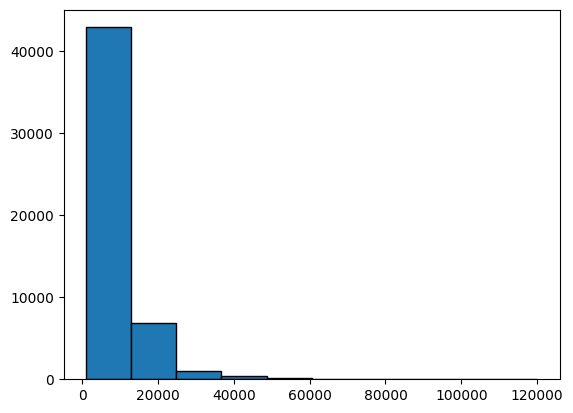

In [4]:
import matplotlib.pyplot as plt

plt.hist(df['priceUSD'], edgecolor='black', range=[1000, 120000])

In [5]:
df[df['priceUSD']>100000]['priceUSD'].count()

33

In [6]:
df.isnull().sum()

make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              47
color                     0
transmission              0
drive_unit             1905
segment                5291
dtype: int64

In [7]:
dupes_df = df[df.duplicated(keep=False)]
dupes_df[dupes_df['make'] == 'audi']

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
1637,audi,100,1100,1989,with mileage,350000.0,petrol,2300.0,burgundy,mechanics,front-wheel drive,E
1695,audi,100,1280,1991,with mileage,305000.0,petrol,2300.0,red,mechanics,front-wheel drive,E
1930,audi,100,1280,1991,with mileage,305000.0,petrol,2300.0,red,mechanics,front-wheel drive,E
2011,audi,100,2000,1988,with mileage,350000.0,petrol,2300.0,blue,mechanics,front-wheel drive,E
2054,audi,100,2000,1988,with mileage,350000.0,petrol,2300.0,blue,mechanics,front-wheel drive,E
2140,audi,100,1100,1989,with mileage,350000.0,petrol,2300.0,burgundy,mechanics,front-wheel drive,E
11201,audi,a4,9500,2008,with mileage,185000.0,petrol,1800.0,gray,mechanics,front-wheel drive,D
11314,audi,a4,6500,2003,with mileage,238000.0,diesel,2500.0,gray,mechanics,front-wheel drive,D
11335,audi,a4,9500,2008,with mileage,185000.0,petrol,1800.0,gray,mechanics,front-wheel drive,D
11564,audi,a4,6500,2003,with mileage,238000.0,diesel,2500.0,gray,mechanics,front-wheel drive,D


In [8]:
df[df['volume(cm3)'].isna()]

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
2268,alfa-romeo,147,8097,2007,with mileage,700.00,electrocar,NaN,burgundy,mechanics,NaN,C
4377,peugeot,406,5780,1995,with mileage,333333.00,electrocar,NaN,silver,auto,front-wheel drive,D
4865,fiat,500,14500,2014,with mileage,49000.00,electrocar,NaN,orange,auto,front-wheel drive,M
4867,fiat,500,13200,2013,with mileage,59900.00,electrocar,NaN,gray,auto,front-wheel drive,M
4868,fiat,500,14500,2015,with mileage,30000.00,electrocar,NaN,gray,auto,front-wheel drive,M
23577,cadillac,elr,25900,2014,with mileage,70000.00,electrocar,NaN,silver,auto,front-wheel drive,NaN
29346,bmw,i3,38000,2018,with mileage,67000.00,electrocar,NaN,other,auto,rear drive,NaN
29347,bmw,i3,57383,2017,with mileage,2822.00,electrocar,NaN,blue,auto,rear drive,NaN
29350,bmw,i3,22900,2014,with mileage,71500.00,electrocar,NaN,silver,auto,rear drive,NaN
29351,bmw,i3,22900,2015,with mileage,50000.00,electrocar,NaN,black,auto,rear drive,NaN


In [9]:
df['make'].unique()

array(['mazda', 'mg', 'renault', 'gaz', 'aro', 'rover', 'uaz',
       'alfa-romeo', 'audi', 'oldsmobile', 'saab', 'peugeot', 'chrysler',
       'wartburg', 'moskvich', 'volvo', 'fiat', 'roewe', 'porsche', 'zaz',
       'luaz', 'dacia', 'lada-vaz', 'izh', 'raf', 'bogdan', 'bmw',
       'nissan', 'mercedes-benz', 'mitsubishi', 'toyota', 'chery', 'gmc',
       'hyundai', 'honda', 'ssangyong', 'suzuki', 'opel', 'seat',
       'volkswagen', 'daihatsu', 'chevrolet', 'geely', 'saturn', 'kia',
       'lincoln', 'eksklyuziv', 'citroen', 'dong-feng', 'pontiac', 'ford',
       'subaru', 'bentley', 'faw', 'cadillac', 'lifan', 'plymouth',
       'hafei', 'shanghai-maple', 'mini', 'jeep', 'skoda', 'mercury',
       'changan', 'lexus', 'isuzu', 'aston-martin', 'lancia',
       'great-wall', 'land-rover', 'jaguar', 'buick', 'daewoo', 'vortex',
       'infiniti', 'byd', 'smart', 'maserati', 'haval', 'acura', 'scion',
       'tata', 'datsun', 'tesla', 'mclaren', 'ravon', 'trabant', 'proton',
       'fso

(array([14817.,  4242.,  1202.,   464.,   259.,   164.,   106.,    49.,
           34.,    18.]),
 array([ 7000., 14100., 21200., 28300., 35400., 42500., 49600., 56700.,
        63800., 70900., 78000.]),
 <BarContainer object of 10 artists>)

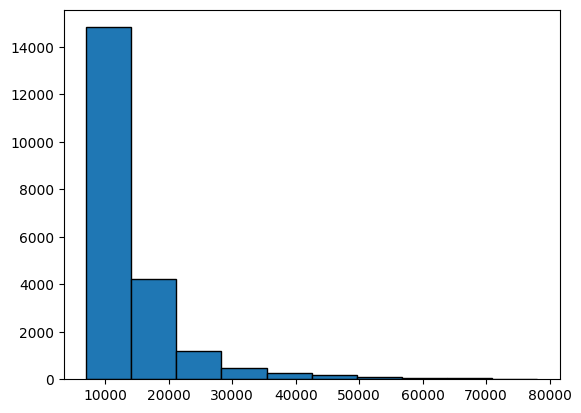

In [10]:
with_drive_unit_df = df[~df['drive_unit'].isna()]
with_drive_unit_df['priceUSD'].describe()
plt.hist(with_drive_unit_df['priceUSD'], edgecolor='black', range=[7000, 78000])

In [11]:
df['color'].unique()

array(['burgundy', 'black', 'silver', 'white', 'gray', 'blue', 'other',
       'purple', 'red', 'green', 'brown', 'yellow', 'orange'],
      dtype=object)

In [12]:
df['drive_unit'].unique()

array(['front-wheel drive', nan, 'rear drive', 'all-wheel drive',
       'part-time four-wheel drive'], dtype=object)